<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Этап-1" data-toc-modified-id="Этап-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Этап 1</a></span></li><li><span><a href="#Этап-2" data-toc-modified-id="Этап-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Этап 2</a></span></li><li><span><a href="#Этап-3" data-toc-modified-id="Этап-3-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Этап 3</a></span></li><li><span><a href="#Этап-4" data-toc-modified-id="Этап-4-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Этап 4</a></span></li><li><span><a href="#Этап-5" data-toc-modified-id="Этап-5-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Этап 5</a></span></li><li><span><a href="#Этап-6" data-toc-modified-id="Этап-6-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Этап 6</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах (м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении


## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
apartments_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#ознакомимся с первыми строками датасета
apartments_data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [3]:
#посмотрим общую информацию о датасете
apartments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
apartments_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


### Вывод

В датафрейме имеются различные типы данных и пропуски.

Замечания по каждому столбцу:


    first_day_exposition - object - нужно поменять на  datetime
    ceiling_height - имеются пропуски
    floors_total - нужно поменять на тип int, т.к. количество этажей не может быть дробным числом, имеются отсутствующие значения
    is_apartment -  отсутствуют значения
    living_area - отсутствуют значения
    kitchen_area - отсутствуют значения
    balcony - отсутствуют значения
    locality_name - отсутствуют значения
    airports_nearest - отсутствуют значения
    cityCenters_nearest - отсутствуют значения, еще можно переименовать столбец
    parks_around3000 -  отсутствуют значения
    parks_nearest - отсутствуют значения
    ponds_around3000 -  отсутствуют значения
    ponds_nearest - отсутствуют значения
    days_exposition - поменять тип на int, отсутствуют значения
    
Кроме того, в данных имеются выбросы. Нереалистичными кажутся 19 комнат, высота потолков 100 м, 2 м жилой площади и нулевое количество комнат.

## Предобработка данных

In [5]:
#посмотрим количество пропусков
apartments_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#Оценим долю пропусков
apartments_data.isnull().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
cityCenters_nearest    0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

In [7]:
apartments_data.duplicated().sum()
#посмотрели количество дубликатов

0

Дубликатов в данных нет, пропуски можно заполнить разными методами. Какие-то можно заполнить нулями, булевые - False, количественные - медианами.

In [8]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
apartments_data['first_day_exposition'] = pd.to_datetime(apartments_data['first_day_exposition'], format = '%Y-%m-%d')

In [9]:
#заменим пропуски в balcony на 0 и сразу изменим тип данных на int

apartments_data['balcony'] = apartments_data['balcony'].fillna(0)
apartments_data['balcony'] = apartments_data['balcony'].astype('int')

In [10]:
#удалим значения с высотой потолков больше 100
apartments_data.drop(apartments_data[apartments_data.ceiling_height >= 100].index, inplace=True)
#удалим значения с жилой площадью меньше 2 метров кв
apartments_data.drop(apartments_data[apartments_data.living_area < 2].index, inplace=True)

In [11]:
apartments_data['ceiling_height'].mean()
#Проверим среднее по столбцу

2.764794870026891

In [12]:
#Посмотрим медианное значение столбца
apartments_data['ceiling_height'].median()

2.65

Медиана и среднее по столбцу ceiling_height сильно не отличаются, значит удаление больших значений является корректным

In [13]:
#Заполним пропуски
apartments_data['is_apartment'] = apartments_data['is_apartment'].fillna(False)

#изменим цену и количество этажей на тип int 
apartments_data['last_price'] = apartments_data['last_price'].astype('int')



Заменим пустые значения по следующему принципу:

- living_area и kitchen_area. Эти параметры достаточно хорошо связаны с общей площадью, т.к. чаще всего в квартирах площадь кухни и жилая площадь имеют какую-то долю от общей. Эту долю можно посчитать на основе имеющихся данных, например, для разного кол-ва комнат.  
- floors_total. Пропусков <1%, можно пренебречь ими. 
- locality_name. Пропусков <1%,  можно пренебречь ими.
- Картографические данные лучше не заполнять.




In [14]:
#медианы для разного количества комнат
print((apartments_data.loc[(apartments_data['rooms'] == 0) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 0) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 1) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 1) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 2) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 2) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 3) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 3) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 4) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 4) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 5) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 5) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 6) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 6) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 7) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 7) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())
print((apartments_data.loc[(apartments_data['rooms'] == 9) & (apartments_data['living_area'].isnull() == False), 'living_area']/apartments_data.loc[(apartments_data['rooms'] == 9) & (apartments_data['living_area'].isnull() == False), 'total_area']).median())

0.689655172413793
0.48247978436657674
0.5850091407678245
0.6316666666666666
0.6597402597402597
0.6518423782149324
0.6794117647058824
0.6816702819956616
0.6282513005202081


In [15]:
# Заполним пропуски
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 0), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 0), 'total_area'] * 0.69
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 1), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 1), 'total_area'] * 0.48
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 2), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 2), 'total_area'] * 0.585
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 3), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 3), 'total_area'] * 0.63
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 4), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 4), 'total_area'] * 0.66
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 5), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 5), 'total_area'] * 0.65
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 6), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 6), 'total_area'] * 0.68
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 7), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 7), 'total_area'] * 0.68
apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 9), 'living_area'] = apartments_data.loc[(apartments_data['living_area'].isnull() == True) & (apartments_data['rooms'] == 9), 'total_area'] * 0.63

In [16]:
#проверяем
apartments_data['living_area'].isna().mean()

0.0

In [17]:
#отношение кухни к общей площади кухни по категориям
print((apartments_data.loc[(apartments_data['total_area'] <= 40), 'kitchen_area']/apartments_data.loc[(apartments_data['total_area'] <= 40), 'total_area']).median())
print((apartments_data.loc[(apartments_data['total_area'] > 40) & (apartments_data['total_area'] <= 50), 'kitchen_area']/apartments_data.loc[(apartments_data['total_area'] > 40) & (apartments_data['total_area'] <= 52), 'total_area']).median())
print((apartments_data.loc[(apartments_data['total_area'] > 50) & (apartments_data['total_area'] <= 70), 'kitchen_area']/apartments_data.loc[(apartments_data['total_area'] <= 70) & (apartments_data['total_area'] > 52), 'total_area']).median())
print((apartments_data.loc[(apartments_data['total_area'] > 70) & (apartments_data['total_area'] <= 150), 'kitchen_area']/apartments_data.loc[(apartments_data['total_area'] > 70) & (apartments_data['total_area'] <= 150), 'total_area']).median())
print((apartments_data.loc[(apartments_data['total_area'] > 150), 'kitchen_area']/apartments_data.loc[(apartments_data['total_area'] > 150), 'total_area']).median())

0.23684210526315788
0.16628145933972083
0.15409309791332262
0.14002333722287047
0.1082349514386361


In [18]:
#заменим
apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] <= 40), 'kitchen_area'] = apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] <= 40), 'total_area'] * 0.24
apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] >40) & (apartments_data['total_area'] <= 52), 'kitchen_area'] = apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] >40) & (apartments_data['total_area'] <= 52),'total_area'] * 0.165
apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] >52) & (apartments_data['total_area'] <= 70), 'kitchen_area'] = apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] >52) & (apartments_data['total_area'] <= 70),'total_area'] * 0.15
apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] >70) & (apartments_data['total_area'] <= 150), 'kitchen_area'] = apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] >70) & (apartments_data['total_area'] <= 150),'total_area'] * 0.14
apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] >150), 'kitchen_area'] = apartments_data.loc[(apartments_data['kitchen_area'].isnull() == True) & (apartments_data['total_area'] > 150), 'total_area'] * 0.11

In [19]:
#проверка
apartments_data['kitchen_area'].isna().mean()

0.0

Имеются квартиры с нулевым значениям комнат, если это не студии, они могут помешать в расчетах.В случе, если это не студии, удалим их.

In [20]:
apartments_data.drop(apartments_data[(apartments_data.rooms == 0) & (apartments_data.studio == False)].index, inplace=True)

### Вывод

На данном этапе мы очистили данные от отклоняющихся значений, заменили пропущенные значения.
Некоторые пропущенные значения оставили незаполненными,  с NaN удобно проводить вычисления, так как это тип float.
Также преобразованы типы данных: из строковых в формат даты, из вещественных в целочисленный.
Квартиры с нулевым количеством комнат, значения потолков выше 100 м  и жилая площадь меньше 2 м кв были удалены из датафрейма.

## Расчёты и добавление результатов в таблицу

Цена квадратного метра: 

In [21]:
#добавляем в таблицу столбец с ценой квадратного метра
apartments_data['price_for_square_meter'] = apartments_data['last_price'] / apartments_data['total_area']



Добавим столбцы с днем недели, месяцем, годом.

In [22]:
#столбцы с днем недели, месяцем, годом
apartments_data['weekday'] = apartments_data['first_day_exposition'].dt.weekday
apartments_data['month'] = apartments_data['first_day_exposition'].dt.month
apartments_data['year'] = apartments_data['first_day_exposition'].dt.year

Столбец с этажом

In [23]:
#создадим функцию, которая проходится по этажам и присваивает им категорию
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'


In [24]:
#применим функцию и создаем столбец с этажом
apartments_data['floor_category'] = apartments_data.apply(floor_category, axis=1)

Добавим отношение жилой площади к общей

In [25]:
#создаем новый столбец
apartments_data['living_to_total'] = apartments_data.living_area / apartments_data.total_area

Добавим отношение площади кухни к общей

In [26]:
apartments_data['kitchen_to_total'] = apartments_data.kitchen_area / apartments_data.total_area

Посмотрим как изменился датафрейм

In [27]:
#откроем первые строки датафрейма
apartments_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,weekday,month,year,floor_category,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,2.00,755.00,nan,"120,370.37",3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,nan,11.00,18.60,1,False,...,0.00,nan,81.00,"82,920.79",1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,nan,5.00,34.30,4,False,...,2.00,574.00,558.00,"92,785.71",3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,nan,14.00,100.17,9,False,...,3.00,234.00,424.00,"408,176.10",4,7,2015,другой,0.63,0.11
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,1.00,48.00,121.00,"100,000.00",1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,nan,12.00,14.40,5,False,...,nan,nan,55.00,"95,065.79",0,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,nan,26.00,10.60,6,False,...,0.00,nan,155.00,"99,195.71",3,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,nan,24.00,41.89,22,False,...,0.00,nan,nan,"110,544.69",3,4,2019,другой,0.58,0.26
8,20,2900000,33.16,2018-05-23,1,nan,27.00,15.43,26,False,...,nan,nan,189.00,"87,454.76",2,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,0.00,nan,289.00,"88,524.59",6,2,2017,другой,0.71,0.11


### Вывод

Таблица готова для исследовательского анализа данных, добавили необходимые столбцы.

## Исследовательский анализ данных

### Этап 1
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Построим гистограммы для каждого параметра.


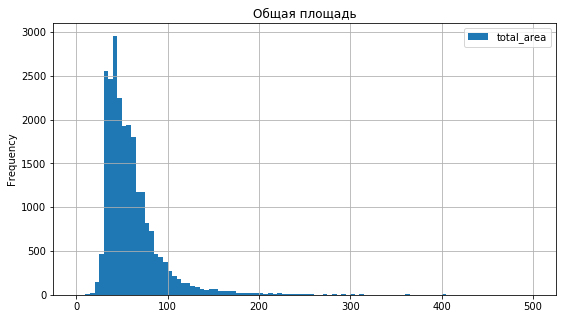

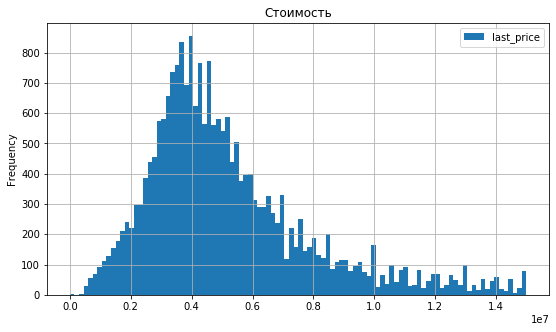

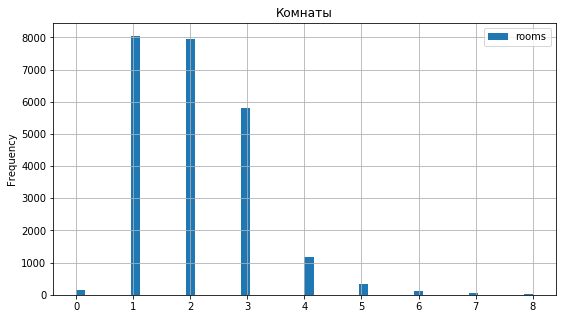

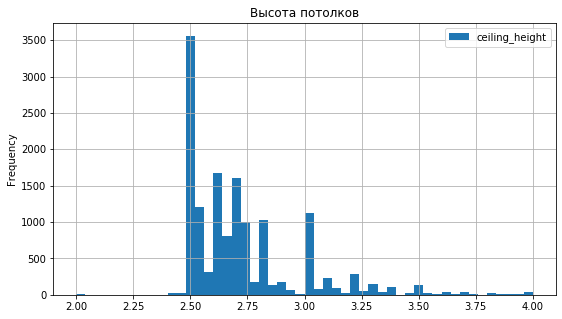

In [28]:
#общая площадь

apartments_data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,5), range = (0,500), title='Общая площадь')
apartments_data['total_area'].describe()


#цена

apartments_data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (9,5), title='Стоимость')
apartments_data['last_price'].describe()


#число комнат

apartments_data.plot(y = 'rooms', kind = 'hist', bins = 50, range = (0,8), grid=True, figsize = (9,5), title='Комнаты')
apartments_data['rooms'].describe()


#высота потолков
apartments_data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, range = (2,4), grid=True, figsize = (9,5), title='Высота потолков')
apartments_data['ceiling_height'].describe()

plt.show()

In [29]:
#медиана площади
apartments_data.total_area.median()


52.0

In [30]:
#медиана стоимости
apartments_data.last_price.median()

4650000.0

In [31]:
#медианное значение высоты потолка
apartments_data.ceiling_height.median()

2.65



Медианное значение площади - 52 кв.м., распределение напоминает вид распределения Пуассона.
Медианная стоимость квартиры составляет 4 млн. 650 тысяч.
Количество однокомнатных и двухкомнатных квартир преобладает, при этом однокомнатных немного больше.
Высота потолков  составляет 2.65 метра, что в принципе стандартная величина для обычной квартиры.

### Этап 2
Перейдем к следующему этапу исследования.

Изучим время продажи квартиры.  Построим гистограмму. Посчитаем среднее и медиану. 

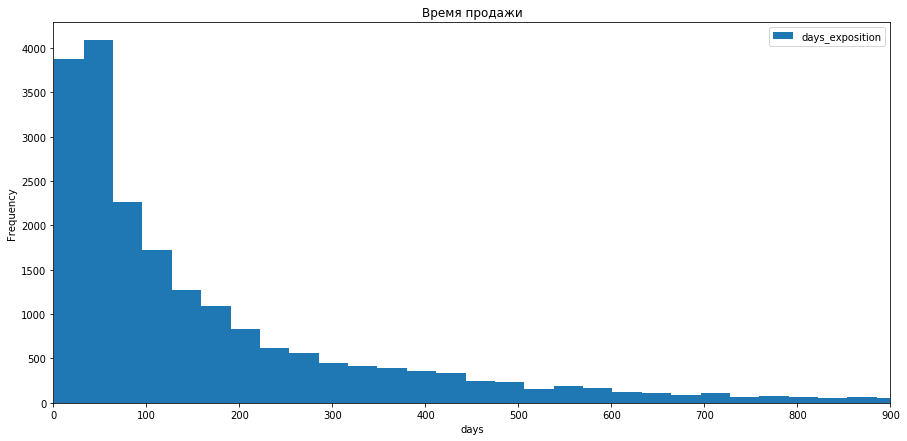

In [32]:
#cтроим гистрограмму времени продажи
apartments_data.plot(y='days_exposition', kind='hist', bins=50, figsize=(15,7), xlim=(0,900), title='Время продажи')
plt.xlabel("days")
plt.show()

In [33]:
#медианное время продажи
apartments_data.days_exposition.median()


96.0

In [34]:
#среднее время продажи
apartments_data.days_exposition.mean()

181.19478932446964

Среднее и медианное значение различаются практически вдвое. Можно сделать вывод о наличии значительных выбросов.

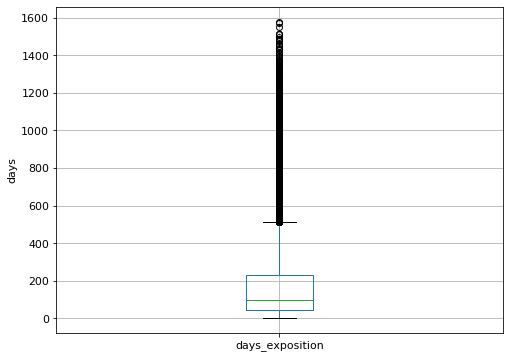

In [35]:
#построим диаграмму размаха
apartments_data.boxplot(["days_exposition"], figsize=(8,6), fontsize=11)
plt.ylabel("days", fontsize=11)
plt.show()

Диаграмма размаха  от минимального значения до примерно 500 дней. Необоснованно быстрых значений у нас нет, а необоснованно долгие - около 500 дней и выше. Можно считать, что нормальные значения у нас лежат от 1 до 500.

Избавимся от аномальных значений

In [36]:
good_exposition_data = apartments_data.query('1<days_exposition<500')['days_exposition']


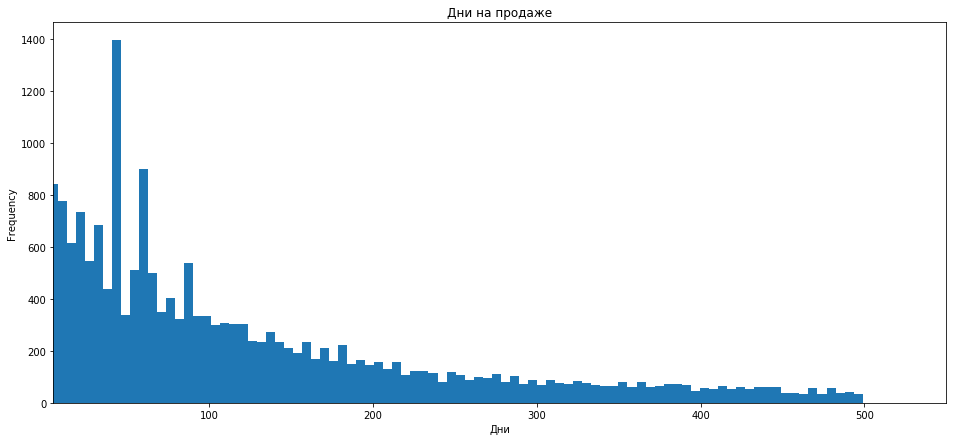

In [37]:
#построим гистограмму
good_exposition_data.plot(kind='hist', bins=90, xlim=(5,550), figsize=(16,7))
plt.xlabel("Дни")
plt.title("Дни на продаже")
plt.show()

In [38]:
good_exposition_data.value_counts().head(15)

45.00    870
60.00    538
7.00     231
30.00    208
90.00    203
4.00     175
3.00     156
5.00     151
14.00    148
9.00     142
8.00     138
20.00    138
44.00    137
11.00    134
18.00    129
Name: days_exposition, dtype: int64

In [39]:
good_exposition_data.median()

85.0

In [40]:
good_exposition_data.mean()

127.21461797572582

Значения 45, 60 встречаются чаще всего, что подозрительно. Может объявления просто снимаются с продажи,  а отражается, будто квартира продана. В таком случае они будут искажать общие значения и от них нужно избавиться.
После фильтрации среднее и медианное значение немного приблизились.
Была мысль убирать из фильтрации значений времени промежутки до 7 дней, но так как хорошие варианты квартир расходятся быстрее, и не стоит забывать срочные продажи - убирать не стала. Значения могут быть вполне реальными.

### Этап 3
Посмотрим какие факторы больше всего влияют на стоимость квартиры.
 
Зависит ли цена от площади, числа комнат, удалённости от центра.
Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
Также изучим зависимость от даты размещения: дня недели, месяца и года.


0.6530934341648412

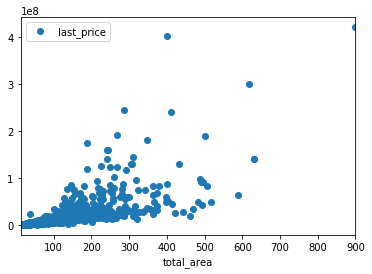

In [41]:
#построим зависимость цены от площади
pivot_table_total_area = apartments_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

pivot_table_total_area.plot(y = 'median', style = 'o')

apartments_data['total_area'].corr(apartments_data['last_price'])

Наблюдается небольшая зависимость цены от площади. С увеличением площади цена возрастает - что закономерно.

Посмотрим зависит ли цена от количества комнат.

0.3642333142293488

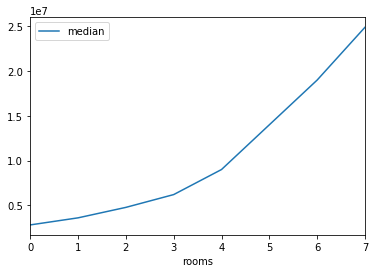

In [42]:
pivot_table_rooms = apartments_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')


apartments_data['rooms'].corr(apartments_data['last_price'])

Логично, что с увеличением количества комнат растет и цена.

Изучим зависимость цены квадратного метра от этажа.

In [43]:
floor_price = apartments_data[['floor_category', 'last_price']].groupby(['floor_category']).median().sort_values('last_price')

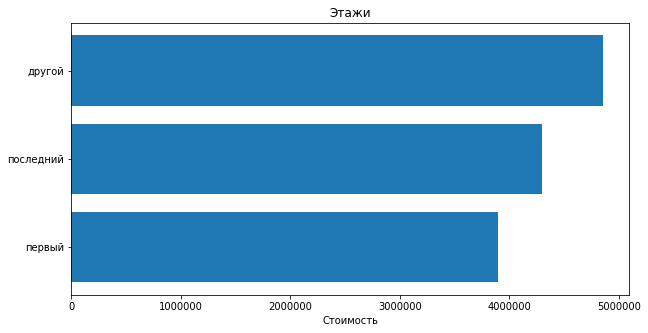

In [44]:
plt.figure(figsize=(10,5))
plt.barh( floor_price.index, floor_price['last_price'])
plt.title("Этажи")
plt.xlabel("Стоимость")
plt.show()

Квартиры на первом и последнем этаже стоят дешевле, что соответствует требованиям рынка.

Посмотрим на зависимость цены от близости к центру города 

-0.2067111428232727

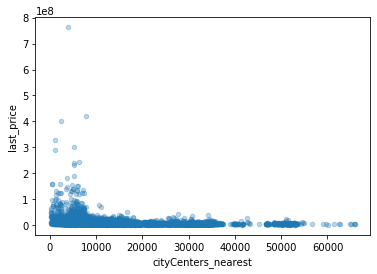

In [45]:
apartments_data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

apartments_data['cityCenters_nearest'].corr(apartments_data['last_price'])

На графике зависимости стоимости квартиры от расстояния до центра города также видна зависимость.
Чем дальше квартира, тем дешевле она стоит.

Изучим зависимость цены от даты размещения.


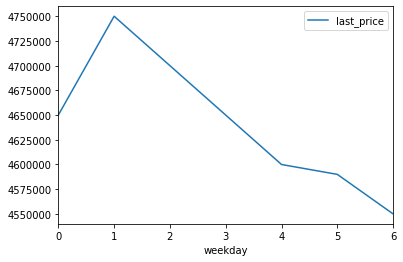

In [46]:
#посмотрим зависимость от дня недели
pivot_weekday_exposition = apartments_data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

pivot_weekday_exposition.plot(y = 'median')



В середине недели фиксируются наибольшие цены,  а вот на выходных есть возможность купить квартиру дешевле. 

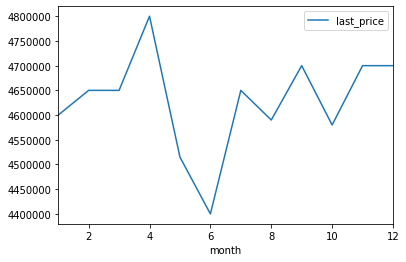

In [47]:
#посмотрим зависимость от месяца
pivot_month_exposition = apartments_data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

pivot_month_exposition.plot(y = 'median')


В июне фиксируются самые низкие показатели цены на недвижимость.

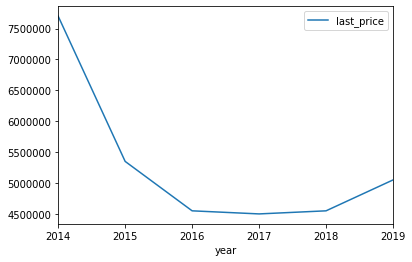

In [48]:
pivot_year_exposition = apartments_data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

pivot_year_exposition.plot(y = 'median')



C 2014 года стоимость квартир начала падать, но начиная с 2018 пошла на увеличение.

### Этап 4

Изучим 10 населенных пунктов с самой высокой стоимостью кв. метра

In [49]:
locality_pivot = apartments_data.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count', 'mean']
locality_pivot = locality_pivot.sort_values('count', ascending = False).head(10)
locality_pivot



,count,mean
locality_name,,
Санкт-Петербург,15692,"8,066,394.44"
посёлок Мурино,515,"3,688,077.05"
посёлок Шушары,440,"4,108,081.82"
Всеволожск,398,"3,789,067.75"
Пушкин,369,"6,469,035.95"
Колпино,338,"3,964,021.44"
посёлок Парголово,324,"4,504,461.29"
Гатчина,307,"3,488,336.68"
деревня Кудрово,287,"4,305,554.77"


In [50]:
#самая высокая стоимость
locality_pivot[locality_pivot['mean']==locality_pivot['mean'].max()]



,count,mean
locality_name,,
Санкт-Петербург,15692,"8,066,394.44"


In [51]:
#самая низкая стоимость
locality_pivot[locality_pivot['mean']==locality_pivot['mean'].min()]


,count,mean
locality_name,,
Выборг,237,"3,250,983.12"


Самые дорогие квартиры из выбранной категории по понятным причинам, в Санкт-Петербурге.
Самая низкая стоимость квартир в Выборге.


Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр, посчитаем среднюю цену для каждого километра.

In [52]:
apartments_data['kilometres_to_cityCenters'] =( apartments_data['cityCenters_nearest']/1000 ).round()

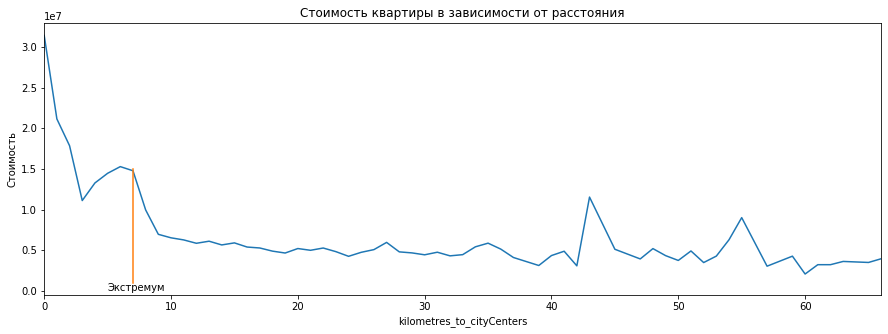

In [53]:


plt.figure(figsize=(15,5))
apartments_data.groupby('kilometres_to_cityCenters')['last_price'].mean().plot()
plt.plot([7, 7], [1000000, 15000000])
plt.title("Стоимость квартиры в зависимости от расстояния")
plt.ylabel("Стоимость")
plt.text(5, 10, "Экстремум")
plt.show()

По графику заметно, что цена меняется примерно на 7 километрах, следовательно это и есть граница центра города.

### Этап 5
Проанализируем квартиры в центре

In [54]:
data_flats_in_center = apartments_data.query('kilometres_to_cityCenters <= 7 and locality_name == "Санкт-Петербург"')

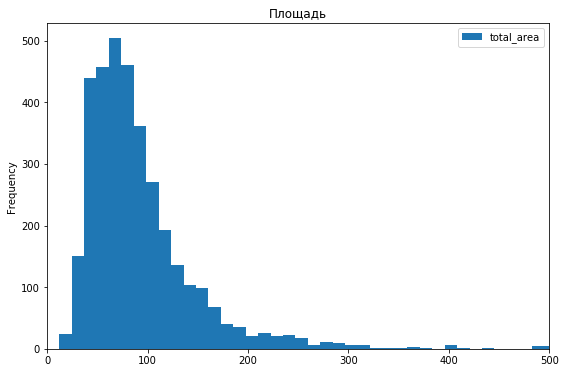

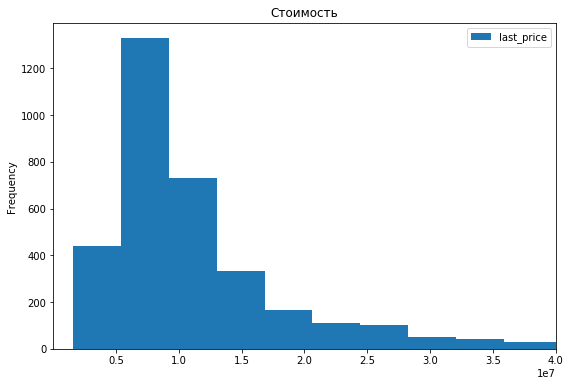

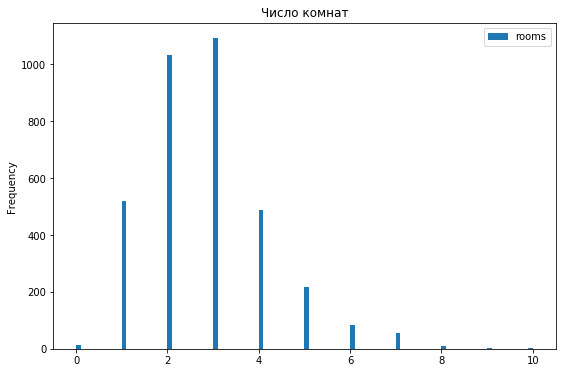

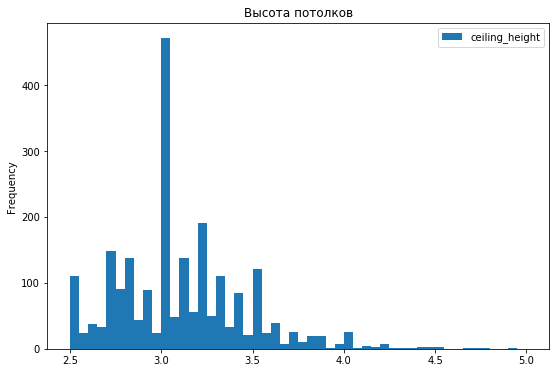

In [55]:
data_flats_in_center.plot(y='total_area', kind='hist', bins=50, xlim=(0,500), figsize=(9,6), title='Площадь')
data_flats_in_center.plot(y='last_price', kind='hist',  bins=200, xlim=(11190,40000000.0), figsize=(9,6), title='Стоимость')
data_flats_in_center.plot(y='rooms', kind='hist', bins=100, range=(0, 10), figsize=(9,6), title='Число комнат')
data_flats_in_center.plot(y='ceiling_height', kind='hist', bins=50, range=(2.5, 5), figsize=(9,6), title='Высота потолков')
plt.show()

In [56]:
#медиана площади
data_flats_in_center['total_area'].median() 

78.7

In [57]:
#медиана цены
data_flats_in_center['last_price'].median() 

9200000.0

In [58]:
#медиана высоты потолков
data_flats_in_center.ceiling_height.median() 

3.0

В квартирах в центре в среднем площадь около 72 кв м, что в целом очень даже не маленькие квартиры.
Такие квартиры также в среднем более дорогие, медианная стоимость составляет 8,5 млн. , а  для всех остальных квартир эта стоимость равняется 4,5 миллионам.
Квартиры в центре также чаще двух- или трехкомнатные, тогда как в общей массе больше однокомнатных.
Больше так же и потолки, в среднем - 3 метра.

### Этап 6
Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

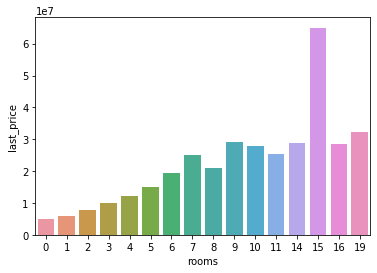

In [59]:
rooms_price_center = data_flats_in_center[['rooms', 'last_price']].groupby(['rooms']).median()
a = sns.barplot(x=rooms_price_center.index, y=rooms_price_center['last_price'])

Стоимость квартиры увеличивается в зависимости от количества комнат, в общем датасете была аналагичная тенденция.

In [60]:
floor_price_center = ( data_flats_in_center[['floor_category', 'last_price']].groupby('floor_category').median()
                      .sort_values('last_price') )



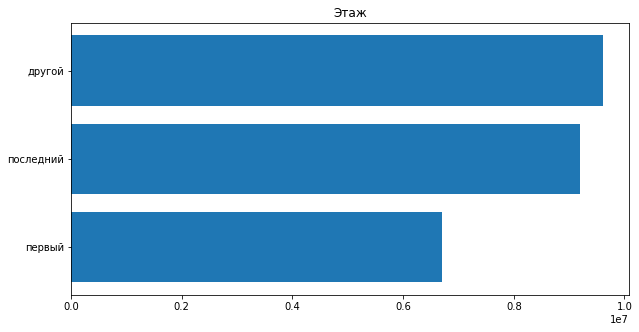

In [61]:
plt.figure(figsize=(10,5))
plt.barh( floor_price_center.index, floor_price_center['last_price'] )
plt.title("Этаж")
plt.show()

Квартиры на первом этаже в центре Санкт-Петербурга дешевле (потому что не вида, ни пейзажа), но последний этаж не уступает другим, как обычно это бывает (потому что Питерские крыши one love)) 

In [62]:
data_flats_in_center[['last_price', 'cityCenters_nearest']].corr()

,last_price,cityCenters_nearest
last_price,1.00,-0.04
cityCenters_nearest,-0.04,1.00


Зависимости от удаленности нет, потому что мы смотрим центр Питера,  а в рамках центра все улицы и дома похожи, на цену скорее повлияют другие факторы (фасад дома, ремонт, например)

In [63]:
year_price_center = data_flats_in_center[['year', 'last_price']].groupby(['year']).median().sort_index()

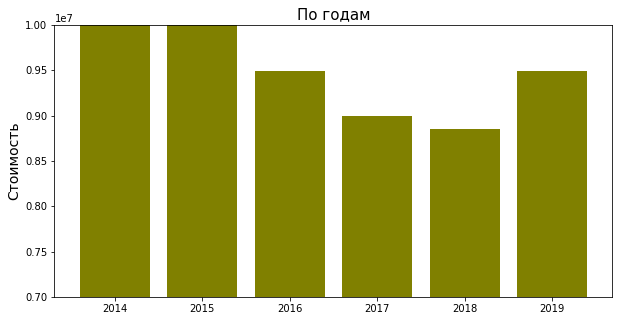

In [64]:
plt.figure(figsize=(10,5))
plt.bar( year_price_center.index, year_price_center['last_price'], color='olive' )
plt.title("По годам", fontsize=15)
plt.ylabel("Стоимость", fontsize=14)
plt.ylim(7000000,10000000)
plt.show()

Диаграмма аналогична той, которая получилась у нас по всем данным, после 2014 цена начала падать.

In [65]:
month_price_center = data_flats_in_center[['month', 'last_price']].groupby(['month']).median().sort_index()
month_price_center.index = ['январь', 'февраль', 'март', "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"]

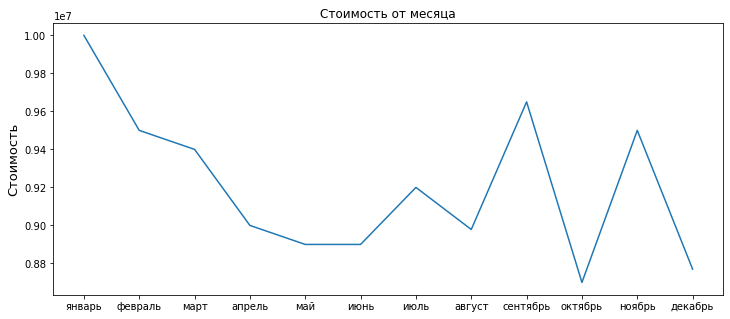

In [66]:
plt.figure(figsize=(12,5))
plt.plot( month_price_center.index, month_price_center['last_price'])
plt.title("Стоимость от месяца")
plt.ylabel("Стоимость", fontsize=13)
plt.show()

Наименьшая стоимость соответствует квартирам,которые продаются в декабре.
А наибольшая стоимость в сентябре (cпрос большой и цену можно поднять).

In [67]:
day_price_center = data_flats_in_center[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
day_price_center.index = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]

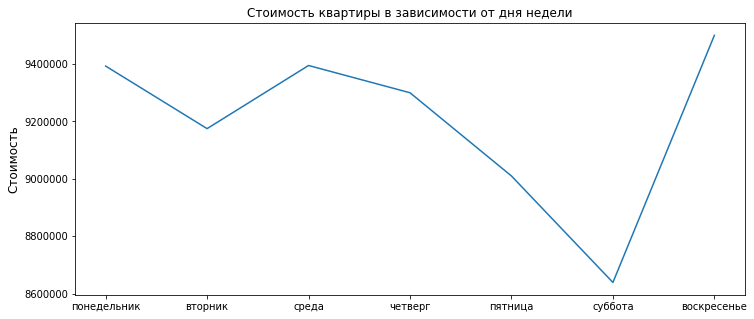

In [68]:
plt.figure(figsize=(12,5))
plt.plot(day_price_center.index, day_price_center['last_price'])
plt.ylabel("Стоимость", fontsize=12)
plt.title("Стоимость квартиры в зависимости от дня недели")
plt.show()

По воскресеньям цены повышаются. Самые низкие цены зафиксированы с пятницы на субботу.
Данные по центру не кореллируют с общими данными.

## Общий вывод

На первом шаге при работе с данными и знакомстве с датасетом были выявлены  пропуски, а также много аномальных значений, от большинства из которых мы постарались избавиться.

На втором этапе для пропущенных значений были восстановлены значения, изменены типы данных, обработаны выбросы.

На третьем этапе мы посчитали:

•	цену квадратного метра;

•	день недели, месяц и год публикации объявления;

•	этаж квартиры; варианты — первый, последний, другой;

•	соотношение жилой и общей площади, а также отношение площади кухни к общей.

На четвертом этапе мы провели исследовательский анализ данных и выявили следующие связи:
В среднем квартира продается около четырех месяцев.
Стоимость квартиры  зависит от площади и количества комнат (очевидно, чем больше комнат и площадь, тем дороже квартира), и так же подтвердилась житейская гипотеза, что в центре - всегда дороже.
На первом этаже закономерно квартиры стоят дешевле. Что касается Санкт-Петербурга, что жилье на верхних этажах вполне себе в цене, красивые виды никто не отменял.
Стоимость квартир с 2014 по 2017 снижалась.
В июне квартиры продавались по самой низкой стоимости, связываю это с тем, что спрос меньше,  и их старались снижать. Данные в Санкт - Петербурге немного разнятся с общими.
Самые дорогие квартиры находятся в Санкт-Петербурге, а самые дешевые в Выборге.
Граница центра - около 7 километров
Квартиры в центре сильно отличаются в цене,площадь квартир больше, в основном встречаются двух  и трехкомнатные квартиры. Более высокие потолки - 3 метра, для остальных квартир примерно 2,65. 
Стоимость квартир в центре от удаленности  не зависит, в отличие от квартир из всей выборки.
Стоимость квартир в центре Санкт-Петербурга также упала с 2014 года.
Пик стоимости квартир приходится на воскресенье.
